In [23]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('./cleaned_rhna4_data.csv', low_memory=False)


In [25]:
X = df.drop(['Unnamed: 0', 'MapBlkLot_Master', 'mapblklot', 'blklot', 'active',
             'geometry', 'Developed', 'PROPLOC', 'RP1PRCLID', 'RP1CLACDE'], axis=1)

In [26]:
X = pd.get_dummies(X, drop_first=True)

In [27]:
X.shape

(153204, 313)

In [28]:
X = X.dropna()

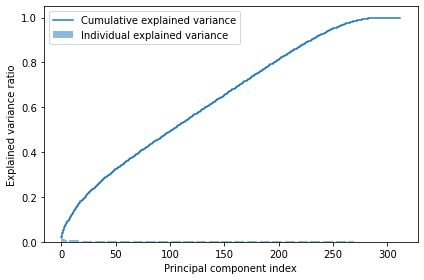

In [29]:
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X)

pca = decomposition.PCA()
pca.fit(X_train_std)
X = pca.transform(X_train_std)

X_train_pca = pca.fit_transform(X_train_std)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()